In [1]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

In [5]:
path = "../data/final_data.csv"
data = pd.read_csv(path, index_col=0)

In [7]:
data.columns

Index(['Datetime', 'Total Load', 'Total Load 1 Year Before, to the FH',
       'System imbalance', 'Temperature', 'Precipitation', 'Wind', 'Pressure',
       'Most recent forecast', 'elia'],
      dtype='object')

<Axes: >

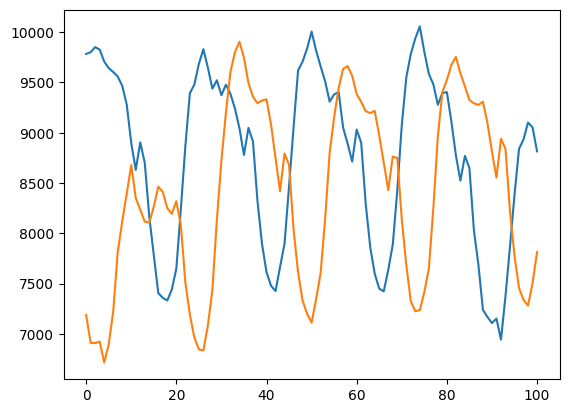

In [15]:
df.loc[:100, "Total Load"].plot()
df.loc[:100, "Total Load 1 Year Before, to the FH"].plot()

In [6]:
X_load = []
X_meteo = []
X_baseline = []
Y_elia = []
Y = []

t_features = 24*28 
features_load = ['Total Load',  'Total Load 1 Year Before, to the FH', 'System imbalance']
features_meteo = ['Temperature', 'Precipitation', 'Wind', 'Pressure']
features_baseline = ['Total Load']

for start in tqdm(range(len(data) - t_features + 1 - 30)):
    X_load.append(data.iloc[start:start + t_features][features_load].values.T)
    X_meteo.append(data.iloc[start:start + t_features][features_meteo].values.T)
    X_baseline.append(data.iloc[start + t_features - 1 + 30 - 7 * 24][features_baseline].values.flatten())
    Y_elia.append(data.iloc[start + t_features - 1 + 30]['Most recent forecast'])
    Y.append(data.iloc[start + t_features - 1]['y'])
    

  0%|          | 0/75198 [00:00<?, ?it/s]

KeyError: 'y'